In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from helper import load_env
load_env()

# Components

In [ ]:
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
embedder = SentenceTransformersDocumentEmbedder()
embedder.warm_up()

In [27]:
embedder

Inputs:
  - documents: List[Document]
Outputs:
  - documents: List[Document]

In [ ]:
from haystack.dataclasses import Document 

documents = [Document(content="Sneha Vardhan Kandregula"),
             Document(content="AI Engineer")]

embedder.run(documents=documents)

# Pipelines
### Initialize a Document Store

In [29]:
from haystack.document_stores.in_memory import InMemoryDocumentStore
document_store = InMemoryDocumentStore()

### Writing documents with embeddings into a document store

In [30]:
from haystack.components.converters.txt import TextFileToDocument
from haystack.components.preprocessors.document_splitter import DocumentSplitter
from haystack.components.embedders import SentenceTransformersDocumentEmbedder
from haystack.components.writers import DocumentWriter

converter = TextFileToDocument()
splitter  = DocumentSplitter()
embedder  = SentenceTransformersDocumentEmbedder()
writer    = DocumentWriter(document_store= document_store)

from haystack import Pipeline
indexing_pipeline = Pipeline()

indexing_pipeline.add_component("converter", converter)
indexing_pipeline.add_component("splitter", splitter)
indexing_pipeline.add_component("embedder", embedder)
indexing_pipeline.add_component("writer", writer)


### Connecting Components

In [31]:
indexing_pipeline.connect('converter', 'splitter')
indexing_pipeline.connect('splitter', 'embedder')
indexing_pipeline.connect('embedder', 'writer')

🚅 Components
  - converter: TextFileToDocument
  - splitter: DocumentSplitter
  - embedder: SentenceTransformersDocumentEmbedder
  - writer: DocumentWriter
🛤️ Connections
  - converter.documents -> splitter.documents (List[Document])
  - splitter.documents -> embedder.documents (List[Document])
  - embedder.documents -> writer.documents (List[Document])

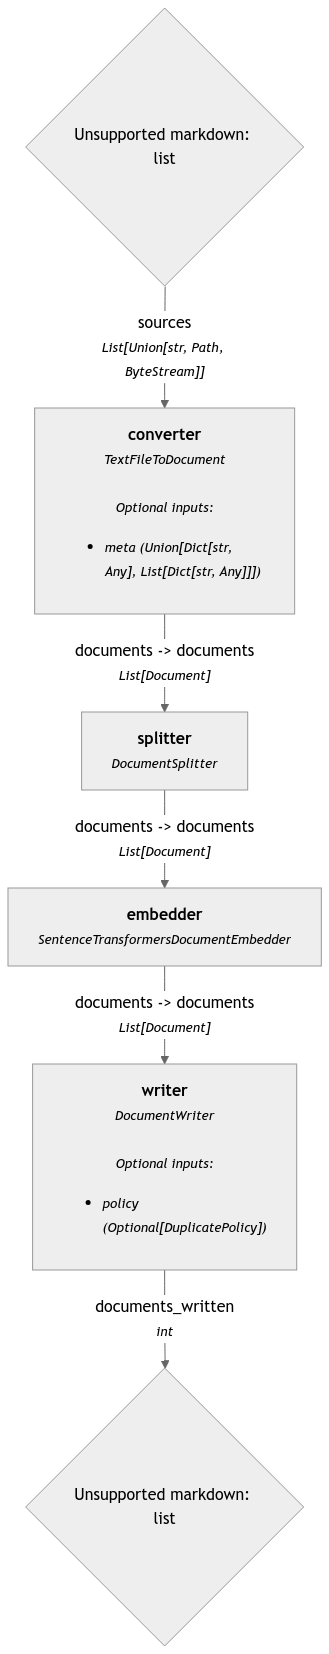

In [32]:
indexing_pipeline.show()

### Runnning Pipelines

In [33]:
indexing_pipeline.run({"converter": {"sources": ['/davinci.txt']}})

ImportError: Failed to import 'sentence_transformers'. Run 'pip install "sentence-transformers>=2.2.0"'. Original error: No module named 'sentence_transformers'